# Aim: Finding correlation between UPDRS score and mobility features (extracted from sensors)

## Part 1:

## Preparing UPDRS scores


### Importing UPDRS assessment file and calculating the sub-total score

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [ ]:
updrs_data=pd.read_excel('CAMERA_DATA_LABELS_2020-08-13_1400.xlsx')
updrs_data


In [ ]:
# Slice data to mobility features
df1 = updrs_data.loc[:28,'3.8 Leg Agility Right':'3.14 Global Spontaneity of Movement (Body Bradykinesia)']

# Map the values in the assessment scores to numerical values
mapping = {'Normal':0, 'Slight':1, 'Mild':2, 'Moderate':3, 'Severe':4 }

df2 =pd.DataFrame()

for i in df1.columns:
    df2[i] = df1[i].map(mapping)

updrs_scores = pd.DataFrame(df2.sum(axis=1),columns=['Scores'])
updrs_scores['Folder'] = updrs_data['folder']
updrs_scores['ID'] = updrs_data['ID']
updrs_scores

### Mapping subject IDs

In [ ]:
subjects_PD_id_dict = {
                            'S02': 9739, 'S03': 9285, 'S04': 9769, 'S05': 9964, 
               'S06': 9746, 'S07': 9270,              'S09': 9283, 'S10': 9107, 
               'S11': 9455, 'S12': 9713, 'S13': 9317, 'S14': 9210, 'S15': 9403,
               'S16': 9791, 'S17': 9813, 'S18': 9525, 'S19': 9419,  
               'S21': 9339, 'S22': 9754, 'S23': 9392, 'S24': 9810,  
                                                                   'S30': 9629, 
                            'S32': 9448, 'S33': 9993, 'S34': 9182, 'S35': 9351,
                }   
# Convert the dictionary into a list of tuples
subject_id_tuples = [(subj, ID) for subj, ID in subjects_PD_id_dict.items()]

# Create a DataFrame from the list of tuples
subjects_PD_id_df = pd.DataFrame(subject_id_tuples, columns=['Subject', 'ID'])
updrs_scores_mappedID = pd.merge(subjects_PD_id_df,updrs_scores,how='left', on='ID')
updrs_scores_mappedID

In [ ]:
import numpy as np

# Subject ID information
subjects_PD       = [              'S02',      'S03',    'S04',      'S05',
                     'S06',        'S07',                'S09',      'S10',
                     'S11',        'S12',      'S13',    'S14',      'S15',
                     'S16',        'S17',      'S18',    'S19',
                     'S21',        'S22',      'S23',    'S24',
                                                                     'S30',
                                   'S32',      'S33',    'S34',      'S35']

# healthy_controls  = ['S08','S20','S25','S26','S27']
# subjects_new_sys = ['S01', 'S28', 'S29', 'S31']

# subjects_All      = ['S01',       'S02',     'S03',     'S04',     'S05',
#                      'S06',       'S07',     'S08',     'S09',     'S10',
#                      'S11',       'S12',     'S13',     'S14',     'S15', 
#                      'S16',       'S17',     'S18',     'S19',     'S20',
#                      'S21',       'S22',     'S23',     'S24',     'S25',
#                      'S26',       'S27',     'S28',     'S29',     'S30',
#                      'S31',       'S32',     'S33',     'S34',     'S35']

subjects_PD_date = [           '20191114','20191120','20191112','20191119',
                    '20200220','20191121',           '20191128','20191203',
                    '20191204','20200108','20200109','20200121','20200122',
                    '20200123','20200124','20200127','20200130',
                    '20200206','20200207','20200213','20200214',
                                                                '20200206',
                               '20191210','20191212','20191218','20200227']


# Subject ID mapping
subjects_PD_id_dict = {
                            'S02': 9739, 'S03': 9285, 'S04': 9769, 'S05': 9964, 
               'S06': 9746, 'S07': 9270,              'S09': 9283, 'S10': 9107, 
               'S11': 9455, 'S12': 9713, 'S13': 9317, 'S14': 9210, 'S15': 9403,
               'S16': 9791, 'S17': 9813, 'S18': 9525, 'S19': 9419,  
               'S21': 9339, 'S22': 9754, 'S23': 9392, 'S24': 9810,  
                                                                   'S30': 9629, 
                            'S32': 9448, 'S33': 9993, 'S34': 9182, 'S35': 9351,
                }   

# The big man. We can build him... we have the technology...
subjects_big_dict = {
               
                'S02': {'id': 9739, 'date': '20191114', 'path': None}, 'S03': {'id': 9285, 'date': '20191120', 'path': None}, 
                'S04': {'id': 9769, 'date': '20191112', 'path': None}, 'S05': {'id': 9964, 'date': '20191119', 'path': None}, 
                'S06': {'id': 9746, 'date': '20200220', 'path': None}, 'S07': {'id': 9270, 'date': '20191121', 'path': None}, 
                                                                       'S09': {'id': 9283, 'date': '20191128', 'path': None}, 
                'S10': {'id': 9107, 'date': '20191203', 'path': None}, 'S11': {'id': 9455, 'date': '20191204', 'path': None}, 
                'S12': {'id': 9713, 'date': '20200108', 'path': None}, 'S13': {'id': 9317, 'date': '20200109', 'path': None}, 
                'S14': {'id': 9210, 'date': '20200121', 'path': None}, 'S15': {'id': 9403, 'date': '20200122', 'path': None}, 
                'S16': {'id': 9791, 'date': '20200123', 'path': None}, 'S17': {'id': 9813, 'date': '20200124', 'path': None}, 
                'S18': {'id': 9525, 'date': '20200127', 'path': None}, 'S19': {'id': 9419, 'date': '20200130', 'path': None}, 
                                                                       'S21': {'id': 9339, 'date': '20200206', 'path': None}, 
                'S22': {'id': 9754, 'date': '20200207', 'path': None}, 'S23': {'id': 9392, 'date': '20200213', 'path': None}, 
                'S24': {'id': 9810, 'date': '20200214', 'path': None},  
                 
               
                'S30': {'id': 9629, 'date': '20200206', 'path': None}, 
                'S32': {'id': 9448, 'date': '20191210', 'path': None}, 'S33': {'id': 9993, 'date': '20191212', 'path': None},
                'S34': {'id': 9182, 'date': '20191218', 'path': None}, 'S35': {'id': 9351, 'date': '20200227', 'path': None},
                }



# Labels for the PD subject UPDRS scores (1 if UPDRS score > 0)
#Y_true = np.asarray([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])


## Part 2:

## Preparing sensor output for correlation



### Building the folder path using subject IDs

In [ ]:
import os

subjects_PD_path_dict = {}
folder_path = {}
initial_path = 'Z:/CAMERA/CAMERA Visits/Mobility Visit/Study Subjects/'

for i, subj in enumerate(subjects_PD):
    subjects_PD_path_dict[subj] = initial_path + subjects_PD_date[i] + '/' + str(subjects_PD_id_dict[subj])+ '/Sensor_Data/'
    # List all files and directories in the folder
    contents = os.listdir(subjects_PD_path_dict[subj])
   
    # Filter out only the directories
    directories = [item for item in contents if os.path.isdir(os.path.join(subjects_PD_path_dict[subj], item))]
  
    if directories:
        folder_path[subj] = subjects_PD_path_dict[subj] + directories[0]
    else:
        folder_path[subj] = None
        

### Task: 360 Degree turn 

In [ ]:
import pandas as pd

DegTurn_csv_file_name = '360 Degree Turn_Trials.csv'
selected_features = ['Turns - Angle (degrees) [mean]' , 'Turns - Angle (degrees) [std]',
                     'Turns - Duration (s) [mean]' , 'Turns - Duration (s) [std]' ,
                     'Turns - Turn Velocity (degrees/s) [mean]' , 'Turns - Turn Velocity (degrees/s) [std]']
DegTurn_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{DegTurn_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        DegTurn_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
DegTurn_dataframe = pd.DataFrame(DegTurn_data).T.reset_index()
DegTurn_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

DegTurn_Final_data = pd.merge(DegTurn_dataframe,updrs_scores_mappedID,how='left', on='Subject').dropna()
DegTurn_Final_data

In [88]:
# Calculate correlations between mobility features and UPDRS scores
features = DegTurn_Final_data.iloc[:,1:-3] 
DegTurn_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], DegTurn_Final_data['Scores'])
    DegTurn_correlations.append((feature, correlation))

# Print the correlations
#for feature, correlation in correlations:
#    print(f"Correlation between {feature} and UPDRS scores: {correlation:.4f}")


# Convert the correlations data into a DataFrame
DegTurn_correlation_df = pd.DataFrame(DegTurn_correlations, columns=['Feature', 'Correlation'])
#DegTurn_correlation_df

### Task: Sit to stand

In [ ]:
import pandas as pd

SitStand_csv_file_name = 'Sit to Stand_trials.csv'
selected_features = ['Duration (s)' , 'Sit to Stand - Duration (s) [mean]' , 'Sit to Stand - Duration (s) [std]' ,
                     'Sit to Stand - Lean Angle (degrees) [mean]' , 'Sit to Stand - Lean Angle (degrees) [std]' ,
                     'Stand to Sit - Duration (s) [mean]' , 'Stand to Sit - Duration (s) [std]' , 
                     'Stand to Sit - Lean Angle (degrees) [mean]' , 'Stand to Sit - Lean Angle (degrees) [std]' ]

SitStand_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{SitStand_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        SitStand_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
SitStand_dataframe = pd.DataFrame(SitStand_data).T.reset_index()
SitStand_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

SitStand_Final_data = pd.merge(SitStand_dataframe,updrs_scores_mappedID,how='left', on='Subject').dropna()



In [86]:
# Calculate correlations between mobility features and UPDRS scores
features = SitStand_Final_data.iloc[:,1:-3] 
SitStand_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], SitStand_Final_data['Scores'])
    SitStand_correlations.append((feature, correlation))

# Convert the correlations data into a DataFrame
SitStand_correlation_df = pd.DataFrame(SitStand_correlations,columns=['Feature', 'Correlation'])
#SitStand_correlation_df

### Task: TUG

In [82]:
import pandas as pd

TUG_csv_file_name = 'TUG_trials.csv'
selected_features = ['Stand to Sit - Duration (s) [mean]' , 'Stand to Sit - Lean Angle (degrees) [mean]' , 
                     'Turns - Angle (degrees) [mean]' , 'Turns - Angle (degrees) [std]' ,'Turns - Duration (s) [mean]' ,
                     'Turns - Duration (s) [std]' , 'Turns - Turn Velocity (degrees/s) [mean]' ,
                     'Turns - Turn Velocity (degrees/s) [std]']
 
TUG_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{TUG_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        TUG_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
TUG_dataframe = pd.DataFrame(TUG_data).T.reset_index()
TUG_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

TUG_Final_data = pd.merge(TUG_dataframe,updrs_scores_mappedID,how='left', on='Subject')#.dropna()
#TUG_Final_data

In [89]:
# Calculate correlations between mobility features and UPDRS scores
features = TUG_Final_data.iloc[:,1:-3] 
TUG_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], TUG_Final_data['Scores'])
    TUG_correlations.append((feature, correlation))

# Convert the correlations data into a DataFrame
TUG_correlation_df = pd.DataFrame(TUG_correlations,columns=['Feature', 'Correlation'])
#TUG_correlation_df

### Task: Sway

In [153]:
import pandas as pd

Sway_csv_file_name = 'Sway_trials.csv'
selected_features = ['Postural Sway - Acc - 95% Ellipse Axis 1 Radius (m/s^2)' , 'Postural Sway - Acc - 95% Ellipse Axis 2 Radius (m/s^2)' ,
                     'Postural Sway - Acc - 95% Ellipse Rotation (radians)' , 'Postural Sway - Acc - Sway Area (m^2/s^4)' ,
                     'Postural Sway - Acc - Centroidal Frequency (Hz)' , 'Postural Sway - Acc - Centroidal Frequency (Coronal) (Hz)' ,
                     'Postural Sway - Acc - Centroidal Frequency (Sagittal) (Hz)' , 'Postural Sway - Acc - Frequency Dispersion (AD)' ,
                     'Postural Sway - Acc - Frequency Dispersion (Coronal) (AD)' , 'Postural Sway - Acc - Frequency Dispersion (Sagittal) (AD)' , 
                     'Postural Sway - Acc - Jerk (m^2/s^5)' , 'Postural Sway - Acc - Jerk (Coronal) (m^2/s^5)' , 
                     'Postural Sway - Acc - Jerk (Sagittal) (m^2/s^5)' , 'Postural Sway - Acc - Mean Velocity (m/s)' ,
                     'Postural Sway - Acc - Mean Velocity (Coronal) (m/s)' , 'Postural Sway - Acc - Mean Velocity (Sagittal) (m/s)' ,
                     'Postural Sway - Acc - Path Length (m/s^2)' , 'Postural Sway - Acc - Path Length (Coronal) (m/s^2)' , 
                     'Postural Sway - Acc - Path Length (Sagittal) (m/s^2)' , 'Postural Sway - Acc - RMS Sway (m/s^2)' , 
                     'Postural Sway - Acc - RMS Sway (Coronal) (m/s^2)' , 'Postural Sway - Acc - RMS Sway (Sagittal) (m/s^2)' , 
                     'Postural Sway - Acc - Range (m/s^2)' , 'Postural Sway - Acc - Range (Coronal) (m/s^2)' , 
                     'Postural Sway - Acc - Range (Sagittal) (m/s^2)' , 'Postural Sway - Angles - 95% Ellipse Axis 1 Radius (degrees)' ,
                     'Postural Sway - Angles - 95% Ellipse Axis 2 Radius (degrees)' , 'Postural Sway - Angles - 95% Ellipse Rotation (radians)' ,
                     'Postural Sway - Angles - Sway Area (degrees^2)' , 'Postural Sway - Angles - Duration (s)' , 
                     'Postural Sway - Angles - RMS Sway (degrees)' , 'Postural Sway - Angles - RMS Sway (Coronal) (degrees)' , 
                     'Postural Sway - Angles - RMS Sway (Sagittal) (degrees)']
 
Sway_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{Sway_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        Sway_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
Sway_dataframe = pd.DataFrame(Sway_data).T.reset_index()
Sway_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

Sway_Final_data = pd.merge(Sway_dataframe,updrs_scores_mappedID,how='left', on='Subject')#.dropna()
#Sway_Final_data

In [152]:
# Calculate correlations between mobility features and UPDRS scores
features = Sway_Final_data.iloc[:,1:-3] 
Sway_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], Sway_Final_data['Scores'])
    Sway_correlations.append((feature, correlation))

# Convert the correlations data into a DataFrame
Sway_correlation_df = pd.DataFrame(Sway_correlations,columns=['Feature', 'Correlation'])
#Sway_correlation_df

### Combining all tasks features (except gait)

In [150]:
correlation_df = pd.concat([DegTurn_correlation_df, SitStand_correlation_df, TUG_correlation_df, Sway_correlation_df], axis=0,ignore_index=True)


### Visualizing the correlations between mobility features and UPDRS score

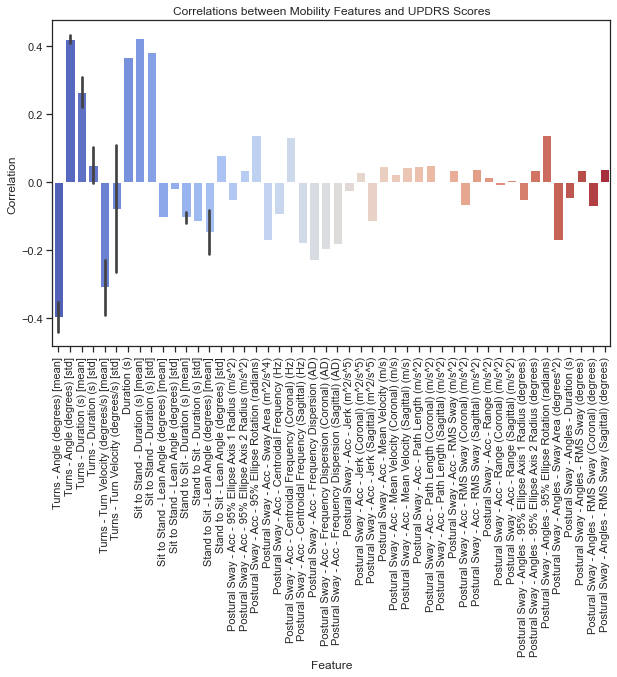

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Correlation', data=correlation_df , palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlations between Mobility Features and UPDRS Scores")
plt.show()

### Task: Gait

In [140]:
import pandas as pd

gait_features = pd.read_csv('C:/Users/sibas/Google Drive Streaming/My Drive/UBC/Codes/fusion/Gait_features.csv')
Gait_csv_file_name = 'MLK Walk_trials.csv'
selected_features = gait_features.iloc[:,0]
 
Gait_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{Gait_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        Gait_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
Gait_dataframe = pd.DataFrame(Gait_data).T.reset_index()
Gait_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

Gait_Final_data = pd.merge(Gait_dataframe,updrs_scores_mappedID,how='left', on='Subject').dropna()


In [132]:
# Calculate correlations between mobility features and UPDRS scores
features = Gait_Final_data.iloc[:,1:-3] 
Gait_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], Gait_Final_data['Scores'])
    Gait_correlations.append((feature, correlation))

# Convert the correlations data into a DataFrame
Gait_correlation_df = pd.DataFrame(Gait_correlations,columns=['Feature', 'Correlation'])


#### Filtering the low correlated gait features

In [151]:
High_Gait_correlated_features = Gait_correlation_df[
    (Gait_correlation_df['Correlation'] > 0.5) | (Gait_correlation_df['Correlation'] < -0.5)]
#High_Gait_correlated_features

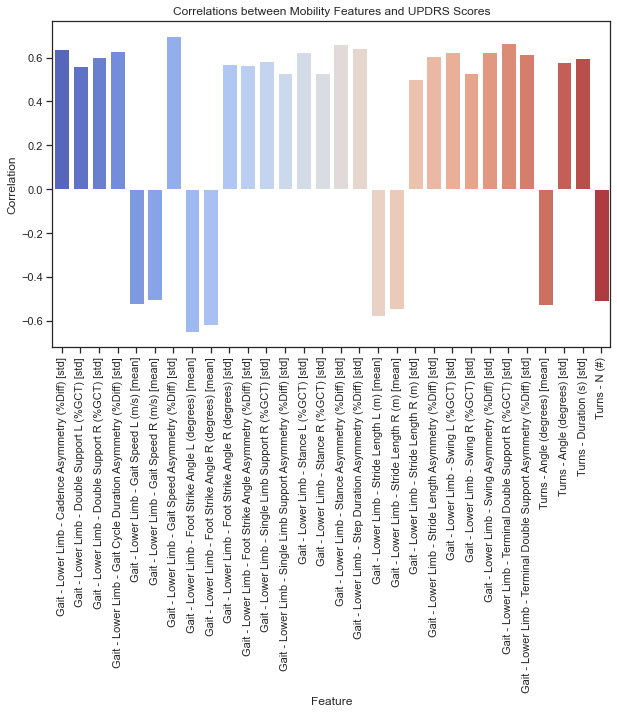

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Correlation', data=High_Gait_correlated_features, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlations between Mobility Features and UPDRS Scores")
plt.show()
